# Accessing OSM Data in Python

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).

## OSMnx

We will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data (using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API)).

In this tutorial, we will learn how to download and visualize OSM data covering a specified area of interest: the neighborhood of Edgewood in Washington DC USA.

In [1]:
# Specify the name that is used to seach for the data
place_name = "Edgewood Washington, DC, USA"

### OSM Location Boundary

Let's also plot the Polygon that represents the boundary of our area of interest (Washington DC). We can retrieve the Polygon geometry using the `ox.geocode_to_gdf` [docs](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) function.

In [3]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

As the name of the function already tells us, `geocode_to_gdf()` returns a GeoDataFrame based on the specified place name query.

In [4]:
# Check the data type
area

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-77.00892 38.92123, -77.0089 38.9208...",-77.008915,38.917008,-76.99358,38.934159,319990164,relation,4634158,38.922613,-77.000537,place,neighbourhood,20,0.334184,neighbourhood,Edgewood,"Edgewood, Ward 5, Washington, District of Colu..."


Let's still verify the data type:

In [5]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Finally, let's plot it.

<Axes: >

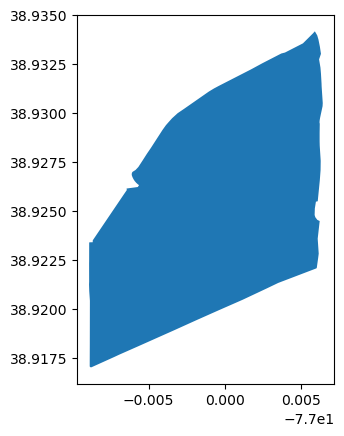

In [6]:
area.plot()

### OSM Building footprints

It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let's download the buildings with `ox.features_from_place` [docs](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.features.features_from_place) function and plot them on top of our street network in Kamppi. 


When fetching spesific types of features from OpenStreetMap using OSMnx `features_from_place` we also need to specify the correct tags. For getting [all types of buildings](https://wiki.openstreetmap.org/wiki/Buildings), we can use the tag `building=yes`.

In [8]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.features_from_place(place_name, tags)
buildings.head()

geometry  \
element  id                                                             
node     358955022                          POINT (-76.99845 38.9313)   
         367143640                          POINT (-77.00417 38.9275)   
relation 3458715    POLYGON ((-77.00108 38.92977, -77.00135 38.929...   
         3943248    POLYGON ((-77.00097 38.92053, -77.00097 38.920...   
         3943249    POLYGON ((-77.00113 38.92034, -77.00116 38.920...   

                   addr:state amenity     building  ele gnis:feature_id  \
element  id                                                               
node     358955022         DC  school          yes   60         2062869   
         367143640         DC     NaN          yes   56         2110453   
relation 3458715          NaN     NaN  residential  NaN             NaN   
         3943248          NaN     NaN          yes  NaN             NaN   
         3943249          NaN     NaN          yes  NaN             NaN   

                                              name         source  \
element  id                                                         
node     358955022             Theological College  USGS Geonames   
         367143640  Main Hall - Trinity University  USGS Geonames   
relation 3458715        Oblates of Mary Immaculate            NaN   
         3943248                               NaN            NaN   
         3943249                               NaN            NaN   

                   dc-gis:pubdate dcgis:capturedate  ... open_air operator  \
element  id                                          ...                     
node     358955022            NaN               NaN  ...      NaN      NaN   
         367143640            NaN               NaN  ...      NaN      NaN   
relation 3458715              NaN               NaN  ...      NaN      NaN   
         3943248              NaN               NaN  ...      NaN      NaN   
         3943249              NaN               NaN  ...      NaN      NaN   

                   screen roof:shape shelter_type start_date layer  \
element  id                                                          
node     358955022    NaN        NaN          NaN        NaN   NaN   
         367143640    NaN        NaN          NaN        NaN   NaN   
relation 3458715      NaN        NaN          NaN        NaN   NaN   
         3943248      NaN        NaN          NaN        NaN   NaN   
         3943249      NaN        NaN          NaN        NaN   NaN   

                   description historic          type  
element  id                                            
node     358955022         NaN      NaN           NaN  
         367143640         NaN      NaN           NaN  
relation 3458715           NaN      NaN  multipolygon  
         3943248           NaN      NaN  multipolygon  
         3943249           NaN      NaN  multipolygon  

[5 rows x 60 columns]

We can plot the footprints quickly.

<Axes: >

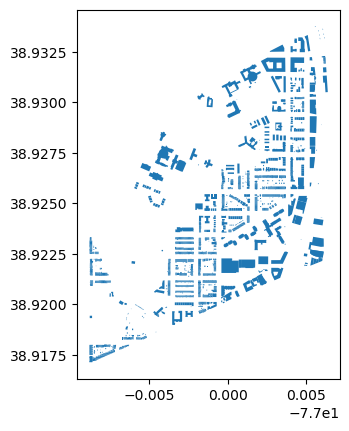

In [9]:
# Plot footprints 
buildings.plot()

### OSM Write Features to .shp
Now let's assume we want to access this data outside of python, or have a permanent copy of our building footprints for Edgewood. 

Since these objects are already `geopandas.GeoDataFrame` it's easy to save them to disk. We simply use the `.to_file()` method.

```{Important}
We can't write OSM GeoDataFrames directly to disk because they contain field types (like lists) that can't be saved in .shp or .geojsons etc. Instead lets isolate only the attributes we are interested in, **including geometry** which is required. 
```

We need to isolate just the attributes we are interested in:

In [10]:
buildings  = buildings.loc[:,buildings.columns.str.contains('addr:|geometry')]

```{Important}
OSM data often contains multiple feature types like mixing points with polygons. This is a problem when we try to write it to disk.
```
We also need to isolate the feature type we are looking for [e.g. Multipolygon, Polygon, Point]. Since here we want building footprints we are going to keep only polygons.

In [11]:
buildings = buildings.loc[buildings.geometry.type=='Polygon']

Now, finally, we can write it to disk.

In [12]:
import warnings

# Suppress the specific pyogrio field name warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Normalized/laundered field name:")
    buildings.to_file('../../pygis/temp/edgewood_buildings.shp')
    buildings.to_file('../../pygis/temp/edgewood_buildings.geojson', driver='GeoJSON')

# Save footprints 
#buildings.to_file('../pygis/temp/edgewood_buildings.shp')  
# Or save in a more open source format
buildings.to_file('../../pygis/temp/edgewood_buildings.geojson', driver='GeoJSON')  

C:\Users\ibhuw\AppData\Local\Temp\ipykernel_27400\593725720.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file('../../pygis/temp/edgewood_buildings.shp')
